In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### 1. Numpy를 활용한 데이터셋 생성

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# test-column_stack 활용 예시
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
# fish_data = [[l,w] for  l,w in zip(fish_length, fish_weight)] 을 쉽게 함
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data[:5])  #index 0~4까지

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
# test
print(np.ones(5))
print(np.zeros(5))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [7]:
#np.concatenate() 2개의 배열을 합쳐서 한줄로!
fish_target = np.concatenate((np.ones(35), np.zeros(14)))  

In [8]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 2. Scikit-learn으로 Train/Test 데이터 나누기

In [9]:
# 비율 설정을 안하면 Default =75% : 25%
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state =42)

In [10]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [11]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [12]:
#도미 35마리, 빙어 14마리  2.5:1 비율

#생선 13마리 : 도미 10마리, 빙어 3마리
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
#stratify=fish_target => Class 비율에 맞게 데이터셋 분할
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [14]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 수상한 도미 한 마리

In [15]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [16]:
#도미:1, 빙어:0
print(kn.predict([[25,150]]))  #빙어로 분류

[0.]


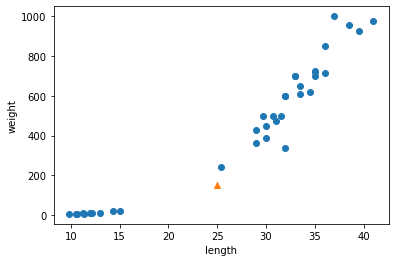

In [17]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

=> 그래프를 보면 도미로 분류되어야하지만, 무게 데이터는 200단위로 커지고 길이 데이터는 5단위로 커짐-> 데이터 정규화가 필요함

In [18]:
distances, indexes = kn.kneighbors([[25,150]])

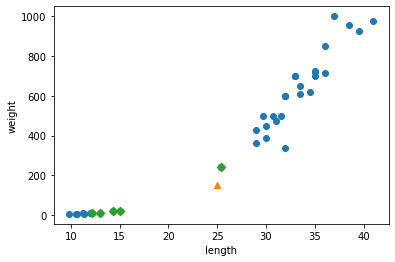

In [19]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker ='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#도미랑 더 가까운데, 빙어로 분류함 - xlabel은 5단위로 커짐 weight는 200단위로 커짐
# -> 데이터 정규화가 필요함

In [20]:
#선택된 점의 길이와 무게 데이터
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [21]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [22]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 4. 정규화
- Nomlization

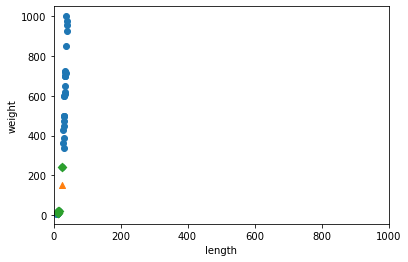

In [23]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker ='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#도미랑 더 가까운데, 빙어로 분류함 - xlabel은 5단위로 커짐 weight는 200단위로 커짐
# -> 데이터 정규화가 필요함

### 표준점수(standard score) 또는 z score를 사용한 정규화
- 분산: 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균 냄
- 표준편차: 분산의 제곱근, 데이터가 분산된 정도
- 표준점수: 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타냄

> 표준점수 공식: (특징 - 평균) / std(표준편차)

In [24]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [25]:
#브로드캐스팅
train_scaled = (train_input - mean)/std

In [26]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

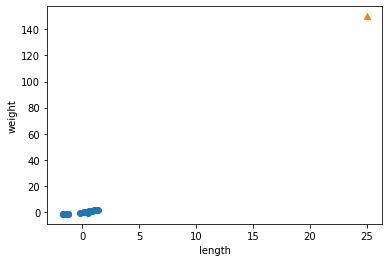

In [27]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
new = ([25,150]-mean)/std

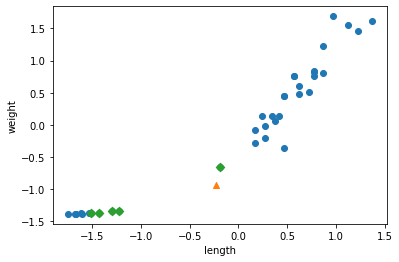

In [35]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker ='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
#정규화 된 데이터로 학습
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [31]:
#Test도 정규화
test_scaled = (test_input - mean)/std

In [32]:
kn.score(test_scaled, test_target)

1.0

In [33]:
#수상한 도미도 정상적으로 도미로 분류
print(kn.predict([new]))

[1.]


> 데이터를 받았으면
1. 특징, 정답 데이터 나눠야 함 (모든 데이터)
    - 특징(길이, 무게) / 정답(0 or 1)
2. train / test 데이터 분리
    - 7:3, 8:2
    - 클래스 별로 분리
3. 정규화(특징 데이터)
    - 표준점수 정규화(z-score) > 추천
    - 0~1로 분류하는 정규화
    - min-max 정규화 > 비추
        - 무게: 0 , 45, 100
        - min:0, max:100
    

### 데이터 처리
> 데이터를 전달 받으면..

1. 데이터 셋 구성
    - x(특징 데이터), y(정답 데이터)
2. Train / Test 데이터 분리
    - 7:3, 8:2
    - 클래스 별로 분리
3. 정규화(특징 데이터)
    - 표준점수(Z-score)
    - 0~1 사이로 정규화하는 것
    - min-max 정규화(비추)